In [4]:
from controls_core.thruster_allocator import thruster_positions, thruster_directions, ThrustAllocator, thrust_map
from controls_core.params import IMU_ZERO, rollPID, yawPID
from controls_core.attitude_control import AttitudeControl

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

import random

%reload_ext autoreload
%autoreload 2

# Thrust Allocator Test

## Thruster Positions and Directions

In [8]:
%matplotlib qt
ax = plt.figure().add_subplot(projection="3d")
ax.quiver3D(*thruster_positions.T, *thruster_directions.T, length=0.1)
ax.scatter(*(0,0,0))
ax.set_aspect('auto')

## Movement Test

### Thrust Newtons

In [ ]:
%matplotlib qt
thrustAllocator = ThrustAllocator()
outputThrusts = thrustAllocator.getThrusts(
    linear_accelerations = [1.0, 0, 0],
    angular_accelerations = [0, 0, 0]
)

ax = plt.figure().add_subplot(projection="3d")
ax.quiver3D(*thruster_positions.T, *(outputThrusts[:, None] * thruster_directions).T, length=0.02)
ax.scatter(*(0,0,0))
ax.set_aspect('auto')

### Thrust PWMs

In [10]:
pwms = thrustAllocator.getThrustPWMs(
    linear_accelerations = [0, 0, -3.0],
    angular_accelerations = [0, 0, 0]
)

pwms[np.array([3, 2, 5, 1, 4, 0])]

array([ 84,  84, 118, 137, 118, 137])

# Thrust Map

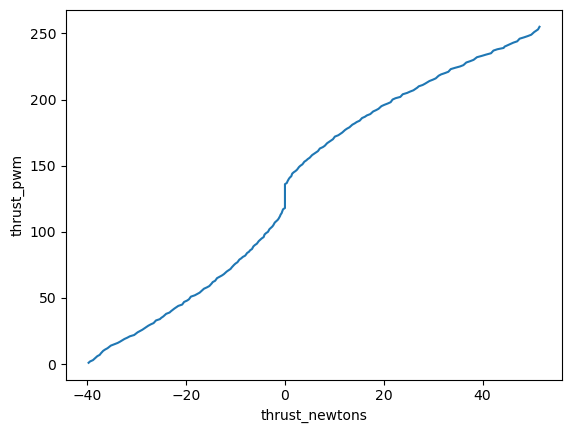

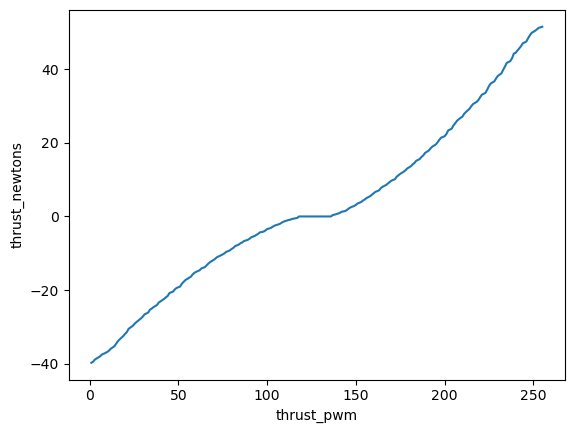

In [11]:
%matplotlib inline
thrust_newtons = thrust_map[:,0]
thrust_pwm = thrust_map[:,1]
plt.plot(thrust_newtons, thrust_pwm)
plt.xlabel("thrust_newtons")
plt.ylabel("thrust_pwm")
plt.show()
plt.plot(thrust_pwm, thrust_newtons)
plt.xlabel("thrust_pwm")
plt.ylabel("thrust_newtons")
plt.show()

In [12]:
thrust_converted = thrust_map[
    np.searchsorted(thrust_pwm, 172, side="left"), 0
]
thrust_converted

10.1043

# Attitude Control

Curr Yaw 2.3415926535897933
Target Yaw 3.141592653589793
Angle Error -0.7999999999999998
Curr Yaw 2.3415926535897933
Target Yaw 3.141592653589793
Angle Error -0.7999999999999998
Curr Yaw 2.3415926535897933
Target Yaw 3.141592653589793
Angle Error -0.7999999999999998
Curr Yaw 2.3506923821985355
Target Yaw 3.141592653589793
Angle Error -0.7909002713912576
Curr Yaw 2.404083492712856
Target Yaw 3.141592653589793
Angle Error -0.7375091608769377
Curr Yaw 2.4215823645990264
Target Yaw 3.141592653589793
Angle Error -0.7200102889907667
Curr Yaw 2.4429407955761655
Target Yaw 3.141592653589793
Angle Error -0.6986518580136281
Curr Yaw 2.4352962855799816
Target Yaw 3.141592653589793
Angle Error -0.7062963680098111
Curr Yaw 2.4701788480253923
Target Yaw 3.141592653589793
Angle Error -0.6714138055644003
Curr Yaw 2.4956961798063264
Target Yaw 3.141592653589793
Angle Error -0.6458964737834663
Curr Yaw 2.6078438145001535
Target Yaw 3.141592653589793
Angle Error -0.5337488390896397
Curr Yaw 2.59124317378

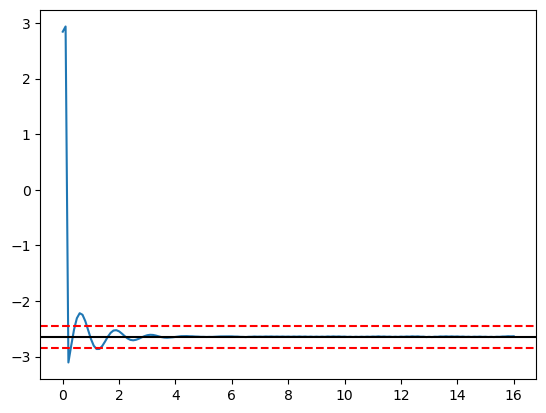

In [14]:
time_interval = 0.1
startpoint = np.pi-0.3
setpoint = np.pi
attitudeControl = AttitudeControl(rollPID, yawPID)

def eval_accel(t, u):
    y, v = u
    thrust = attitudeControl.getAttitudeCorrection(currRPY=[0,0,y], targetRPY=[0,0,setpoint])[2]
    accel = thrust + random.normalvariate(0, 0.1)
    return [v, accel]

def constrain(val, low, high):
    return min(high, max(low, val))

t_span = [0,16]
sol = solve_ivp(eval_accel, t_span=t_span, y0=[startpoint,0], atol=10, max_step=time_interval)
angles = list(map(attitudeControl.boundAngle, sol.y[0]))

plt.plot(sol.t, angles)

zero = attitudeControl.boundAngle(setpoint + IMU_ZERO[2])
plt.axhline(zero, color='k')
plt.axhline(zero+0.2, color='r', linestyle='--')
plt.axhline(zero-0.2, color='r', linestyle='--')